# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Explore dataset

In [2]:
#Import dataset
mpd = pd.read_csv('Mobile_Price_Data.csv')
mpd.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [3]:
# Check for missing values
mpd.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
# Remove rows with missing values
mpd = mpd.dropna()

In [5]:
# Check for duplicated rows
mpd.duplicated().sum()

0

In [6]:
# Check the shape of the cleaned dataset
mpd.shape

(1995, 21)

In [7]:
mpd.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


<Axes: >

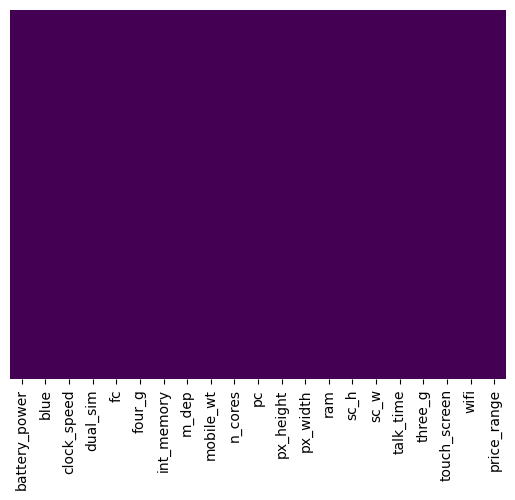

In [8]:
# Check to see if there is any null values
sns.heatmap(mpd.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [9]:
#Information of dataframe
mpd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1995 non-null   int64  
 1   blue           1995 non-null   int64  
 2   clock_speed    1995 non-null   float64
 3   dual_sim       1995 non-null   int64  
 4   fc             1995 non-null   int64  
 5   four_g         1995 non-null   int64  
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1995 non-null   int64  
 9   n_cores        1995 non-null   int64  
 10  pc             1995 non-null   int64  
 11  px_height      1995 non-null   int64  
 12  px_width       1995 non-null   float64
 13  ram            1995 non-null   float64
 14  sc_h           1995 non-null   int64  
 15  sc_w           1995 non-null   int64  
 16  talk_time      1995 non-null   int64  
 17  three_g        1995 non-null   float64
 18  touch_screen 

# Studying Feature Correlation


In [10]:
# Compute correlation
corr = mpd.corr()['price_range']
print(corr)

battery_power    0.202652
blue             0.020846
clock_speed     -0.006926
dual_sim         0.018153
fc               0.019327
four_g           0.014572
int_memory       0.043861
m_dep            0.000776
mobile_wt       -0.028663
n_cores          0.003573
pc               0.031831
px_height        0.147946
px_width         0.164763
ram              0.917131
sc_h             0.023067
sc_w             0.037330
talk_time        0.022085
three_g          0.023771
touch_screen    -0.031155
wifi             0.020394
price_range      1.000000
Name: price_range, dtype: float64


In [11]:
# Remove correlation of 'price_range' with itself
corr = corr.drop('price_range')

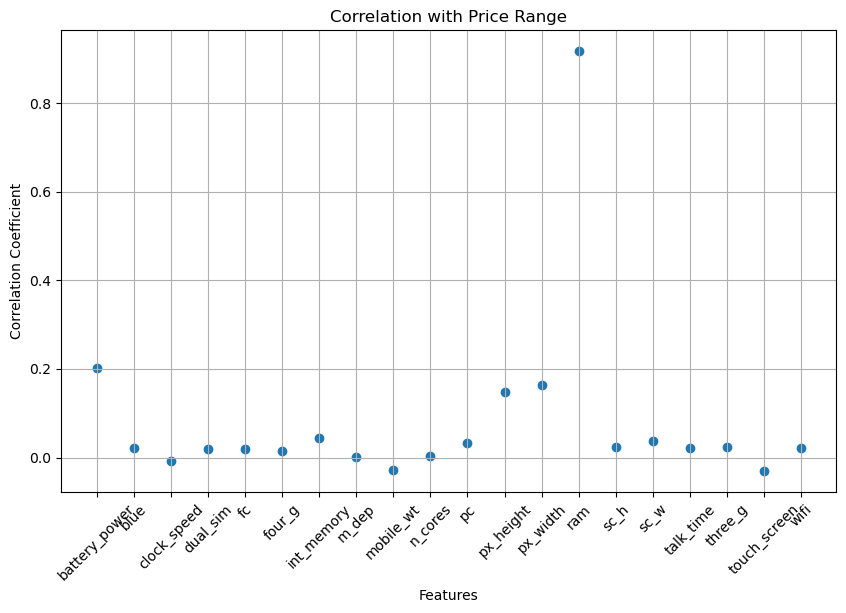

In [12]:
# PLotting the correlation
plt.figure(figsize=(10,6))
plt.scatter(corr.index, corr.values)
plt.title('Correlation with Price Range')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The scatter plot reveals clear trends in the correlation between various features and the price range of mobile devices. RAM exhibits a strong positive correlation, indicating that devices with higher RAM capacities tend to have higher price ranges. Battery power shows a moderate positive correlation, suggesting that devices with greater battery capacities may command slightly higher prices. On the other hand, features such as dock speed, mobile weight, and touch screen exhibit weak or negligible correlations with the price range, indicating that they have little influence on pricing compared to RAM and battery power. Overall, RAM emerges as the most significant predictor of price range, followed by battery power, while other features have minimal impact on pricing decisions.

# Split the dataset

In [13]:
#import library
from sklearn.model_selection import train_test_split

In [14]:
# Assuming 'X' contains the features and 'y' contains the target variable 'price_range'
# Splitting the dataset into features (X) and target variable (y)
X = mpd.drop(columns=['price_range'])  # Assuming 'price_range' is the target variable
y = mpd['price_range']

In [15]:
# Splitting the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model

In [16]:
# Import library
from sklearn.linear_model import LogisticRegression

In [17]:
# Initialize and train the logistic regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Calculate the Accuracy

In [18]:
# Import library
from sklearn.metrics import accuracy_score

In [19]:
# Predicting the target variable for test set
y_pred_test = logistic_reg_model.predict(X_test)

In [20]:
# Calculating the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

In [21]:
# Predicting the target variable for training set (for comparison)
y_pred_train = logistic_reg_model.predict(X_train)

In [22]:
# Calculating the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.6397243107769424
Test Accuracy: 0.6240601503759399


*** Model Explanation and Evaluation: ***
1. Model Explanation:
- Logistic Regression: This model predicts the price range of mobile devices based on features like RAM, battery power, etc. It calculates probabilities and makes predictions.
2. Evaluation:
- Training Accuracy: The model predicts the correct price range for about 64% of the devices in the training data.
- Test Accuracy: It predicts the correct price range for about 62% of the devices in the test data.
3. Performance Assessment:
- Comparison of Training and Test Accuracy: The model performs similarly on both the training and test sets, indicating it's not memorizing the training data too much (overfitting) or too little (underfitting).
- Room for Improvement: While the model's performance is okay, it could be better. We might need more or better features, a more complex model, or more data to improve accuracy.

In essence, the model is decent, but there's potential to make it better by improving features, model complexity, or data quality.

# Train a KNN Model

In [23]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
# Set k value
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [25]:
# Train the KNN model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Predictions
train_predictions_knn = knn_model.predict(X_train)
test_predictions_knn = knn_model.predict(X_test)

In [27]:
# Calculate accuracy
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)

In [28]:
print("Training Accuracy (KNN):", train_accuracy_knn)
print("Test Accuracy (KNN):", test_accuracy_knn)

Training Accuracy (KNN): 0.9536340852130326
Test Accuracy (KNN): 0.9172932330827067


1. Training Accuracy (KNN): The model predicts the price range category with about 95% accuracy on the training data. This high accuracy suggests that the model is fitting the training data very well, possibly capturing the underlying patterns effectively.
2. Test Accuracy (KNN): On the test data, the model achieves an accuracy of approximately 92%. This indicates that the model generalizes well to new, unseen data, maintaining a high level of accuracy.

Overall, the KNN model appears to perform very well, with high accuracy on both the training and test sets. The close proximity between training and test accuracies suggests that the model is not overfitting, and it can reliably predict the price range category of mobile devices based on the selected features.

In [29]:
# Import library
from sklearn.model_selection import GridSearchCV

In [30]:
# Define parameter grid
param_grid = {'n_neighbors': range(1, 21)}

In [31]:
# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [32]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

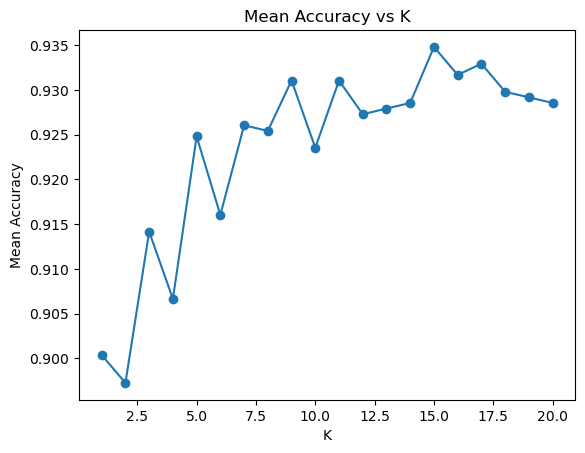

In [33]:
# Visualize results
results = grid_search.cv_results_
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('K')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs K')
plt.show()

In [34]:
# Best K value
best_k = grid_search.best_params_['n_neighbors']
print("Best K value:", best_k)

Best K value: 15


In [35]:
# Best model
best_model = grid_search.best_estimator_

In [36]:
# Predictions
train_predictions_best = best_model.predict(X_train)
test_predictions_best = best_model.predict(X_test)

In [37]:
# Calculate accuracy
train_accuracy_best = accuracy_score(y_train, train_predictions_best)
test_accuracy_best = accuracy_score(y_test, test_predictions_best)

print("Training Accuracy (Best KNN):", train_accuracy_best)
print("Test Accuracy (Best KNN):", test_accuracy_best)

Training Accuracy (Best KNN): 0.9536340852130326
Test Accuracy (Best KNN): 0.9448621553884712


***Evaluation of the three models***
1. Logistic Regression:
Strengths:
- Simple and easy to implement.
- Provides probabilities for predictions, which can be useful for decision-making.
- Less prone to overfitting when the number of features is small.
Weaknesses:
- Assumes a linear relationship between features and the target variable, which may not always hold true.
- Limited flexibility to capture complex patterns in the data.
- May not perform well if the data is highly non-linear.
2. KNN (K-Nearest Neighbors):
Strengths:
- Non-parametric method, which means it makes no assumptions about the underlying data distribution.
- Intuitive concept: predictions are based on the majority class of the nearest neighbors.
- Can capture complex decision boundaries and is robust to noisy data.
Weaknesses:
- Computationally expensive, especially for large datasets, as it requires storing all training instances.
- Prediction time can be slow, as it needs to calculate distances to all training instances.
- Sensitive to the choice of distance metric and the number of neighbors (K), which need to be carefully selected.
3. Tuned KNN:
Strengths:
- Addresses the weakness of the original KNN model by selecting the optimal value of K through hyperparameter tuning.
- Can potentially improve performance by finding the best balance between bias and variance.
- Provides more reliable predictions by reducing the risk of overfitting or underfitting.
Weaknesses:
- GridSearchCV, used for hyperparameter tuning, can be computationally expensive, especially for larger parameter grids.
- May still suffer from the inherent weaknesses of the original KNN model, such as sensitivity to noisy data and the curse of dimensionality.

Overall, Logistic Regression might be the best choice initially due to its simplicity, interpretability, and computational efficiency. However, if the data exhibits non-linear relationships and complex patterns that Logistic Regression struggles to capture, KNN (potentially tuned for optimal K) could be a better option despite its computational cost. It's essential to compare the performance of both models on the specific dataset and consider factors like interpretability and computational resources before making a final decision.